Import Library

In [31]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

### NOTE
-> pake command di bawah cuy buat install librarynya dlu klo mau run


```
pip install scikit-fuzzy
```



## Define Parameter Fuzzy
1. Curah Hujan
2. Suhu / Temperatur
3. Kecepatan angin (m/s)
4. Kelembaban

##Output Parameter
1. Kebakaran Chance

In [32]:
curah_hujan = ctrl.Antecedent(np.arange(0, 1001, 1), 'Curah Hujan')
temperatur = ctrl.Antecedent(np.arange(0, 38, 1), 'Temperatur')
kecepatan_angin = ctrl.Antecedent(np.arange(0, 35, 1), 'Kecepatan Angin')
kelembaban = ctrl.Antecedent(np.arange(0, 71, 1), 'Kelembaban')
out_chance = ctrl.Consequent(np.arange(0, 101, 1), 'Chance Kebakaran')

In [33]:
curah_hujan['rendah'] = fuzz.trimf(curah_hujan.universe, [0 , 50 , 100])
curah_hujan['menengah'] = fuzz.trimf(curah_hujan.universe, [100 , 200 , 300])
curah_hujan['tinggi'] = fuzz.trimf(curah_hujan.universe, [300 , 400 , 500])
curah_hujan['sangat tinggi'] = fuzz.trimf(curah_hujan.universe, [500 , 750 , 1000])

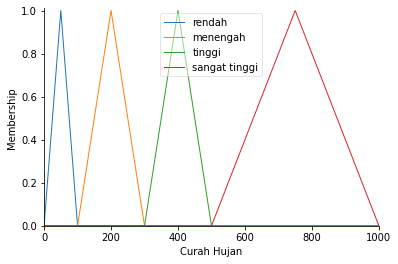

In [34]:
curah_hujan.view()

In [35]:
temperatur['rendah'] = fuzz.trimf(temperatur.universe, [0 , 7.5 , 15])
temperatur['normal'] = fuzz.trimf(temperatur.universe, [11 , 18.5 , 26])
temperatur['panas'] = fuzz.trimf(temperatur.universe, [22 , 29.5 , 37])

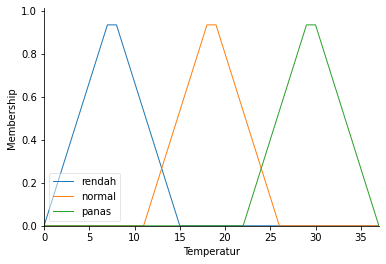

In [36]:
temperatur.view()

In [37]:
kecepatan_angin['pelan'] = fuzz.trimf(kecepatan_angin.universe, [0 , 2.7 , 5.4])
kecepatan_angin['sedang'] = fuzz.trimf(kecepatan_angin.universe, [5.5 , 9.65 , 13.8])
kecepatan_angin['kencang'] = fuzz.trimf(kecepatan_angin.universe, [13.9 , 19.15 , 24.4])
kecepatan_angin['sangat kencang'] = fuzz.trimf(kecepatan_angin.universe, [24.5 , 29.75 , 35])

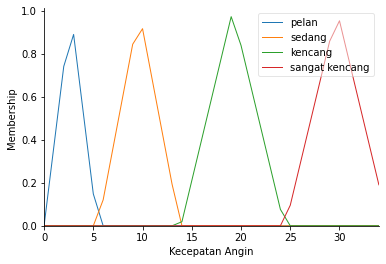

In [38]:
kecepatan_angin.view()

In [39]:
kelembaban['dry'] = fuzz.trimf(kelembaban.universe, [0 , 10 , 20])
kelembaban['moist'] = fuzz.trimf(kelembaban.universe, [15 , 32.5 , 50])
kelembaban['wet'] = fuzz.trimf(kelembaban.universe, [40 , 55 , 70])

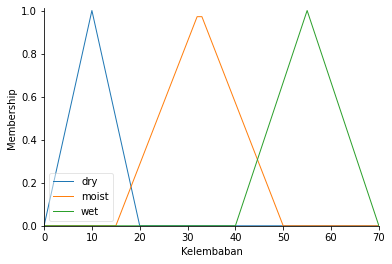

In [40]:
kelembaban.view()

In [41]:
out_chance['low'] = fuzz.trimf(out_chance.universe, [0 , 16.65 , 33.3])
out_chance['medium'] = fuzz.trimf(out_chance.universe, [33.3 , 49.95 , 66.6])
out_chance['high'] = fuzz.trimf(out_chance.universe, [66.6 , 83.3 , 100])

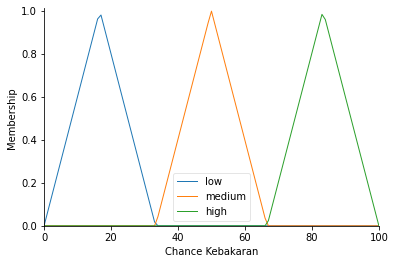

In [42]:
out_chance.view()

#Define Rules

In [43]:
rule1 = ctrl.Rule(curah_hujan['rendah'] & temperatur['panas'] & kecepatan_angin['kencang'] & kelembaban['dry'], out_chance['high'])
rule2 = ctrl.Rule(curah_hujan['rendah'] & temperatur['normal'] & kecepatan_angin['kencang'] & kelembaban['dry'], out_chance['high'])
rule3 = ctrl.Rule(curah_hujan['tinggi'] & temperatur['normal'] & kecepatan_angin['kencang'] & kelembaban['dry'], out_chance['medium'])
rule4 = ctrl.Rule(curah_hujan['sangat tinggi'] & temperatur['panas'] & kecepatan_angin['kencang'] & kelembaban['dry'], out_chance['medium'])

In [44]:
chance_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4])

In [45]:
kebakaran = ctrl.ControlSystemSimulation(chance_ctrl)

## TEST INPUT HERE

In [46]:
kebakaran.input['Curah Hujan'] = 40
kebakaran.input['Temperatur'] = 25
kebakaran.input['Kecepatan Angin'] = 15
kebakaran.input['Kelembaban'] = 7
kebakaran.compute()

##  OUTPUT 

83.2807914195283


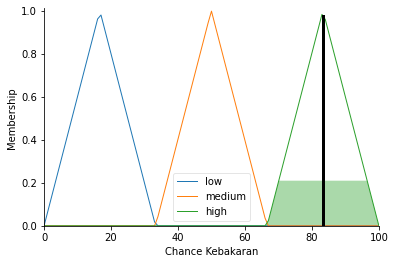

In [47]:
print(kebakaran.output['Chance Kebakaran'])
out_chance.view(sim=kebakaran)